# Discord Data Hypothesis Testing

### Introduction to the Data
The dataset used is a dataset of the message histories of Vincent and Kevin on a particular server/direct message on Discord.  
The dataset's target is mainly the server with the most history as possible.  
Any message log on discord is recorded as a csv with the following attributes:  
1. Their ID's
1. Their Timestamp
1. Their Contents of the message
    - Contents are usually just the words in the message or any mentions
1. Their Attachments of the message
    - A message may not have any attachments

The follow attributes extracted from the data are as follows:
1. ID of the message
    - The higher the ID, the older the message
1. Timestamp of the message
    - Timestamps consist of the following:
        - The Date of the message
        - The exact time of the message
1. The length of the message
    - We find the length by how many characters there are in the in the message
1. Punctuation count of the message
    - Any of the following count as punctuation in the dataset: `., ?, !`

### Cleaning the Data
Since the attributes we are taking are the `ID, Timestamp, message length, and punctuation`, we need to clean the data to get a dataset with these attributes.

In [1]:
import importlib
import utils
importlib.reload(utils)
import pandas as pd

kev_file = "kev_data"                                 # name of the file
kevin_df = pd.read_csv(kev_file + ".csv")             # read in the discord dataset

vin_file = "vin_data"
vincent_df = pd.read_csv(vin_file + "_cleaned.csv")

utils.clean_data(kevin_df, kev_file)
# utils.clean_data(vincent_df, vin_file)

print("1. Kevin's Message Data:")
print(kevin_df)
print()
print("2. Vincent's Message Data:")
print(vincent_df)

1. Kevin's Message Data:
                      ID                         Timestamp  Message Length  \
0     886368172259823626  2021-09-11 21:50:40.191000+00:00              25   
1     886368155776217138  2021-09-11 21:50:36.261000+00:00              25   
2     886124701859078165  2021-09-11 05:43:12.324000+00:00              14   
3     886124680203882526  2021-09-11 05:43:07.161000+00:00               3   
4     885205982018424892  2021-09-08 16:52:32.445000+00:00               4   
...                  ...                               ...             ...   
9881  229739861148434432  2016-09-25 23:04:11.258000+00:00              49   
9882  229739761722458112  2016-09-25 23:03:47.553000+00:00              50   
9883  229734380916965377  2016-09-25 22:42:24.669000+00:00              43   
9884  229733647358492673  2016-09-25 22:39:29.775000+00:00              27   
9885  229733601850163211  2016-09-25 22:39:18.925000+00:00              10   

      Punctuation Count  Has Attachmen

## Splitting and Aggregating the Data
Both of the cleaned dataframes will be split down and aggregated:
1. Split by the Year then by the month for each of the years
    * Each year will be split into different dataframes
1. Aggregated by the numeric sum of the column

In [2]:
# now we want to split the data by month for each person
# Persons: Kevin, Vincent

kevin_list_by_month = utils.split_data(kevin_df, 'Kevin')
vincent_list_by_month = utils.split_data(vincent_df, "Vincent")
            
# range is from 2016 - 2021
# 0 = 2016
# 1 = 2017
# 2 = 2018
# ...
# 5 = 2021

# access both of our 2018 data
kevin_2018_data = kevin_list_by_month[2]
vincent_2018_data = vincent_list_by_month[2]
    
# print out a sample year
print("Kevin's 2018 Aggregated Message Data:")
print(kevin_2018_data)          # printing out kevin's the 2018 data as a sample
print()
print("Vincent's 2018 Aggregated Message Data:")
print(vincent_2018_data) 

Kevin's 2018 Aggregated Message Data:
   Month Message Length Punctuation Count Attachment Count Data Owner
0    Jan            597                10               20      Kevin
1    Feb           1804                59               40      Kevin
2    Mar           1313                30                9      Kevin
3    Apr           2684                78               19      Kevin
4    May           2422               119               36      Kevin
5    Jun           1115                47                7      Kevin
6    Jul          12758               388               61      Kevin
7    Aug           3814               126              103      Kevin
8    Sep           2771               106               51      Kevin
9    Oct           1665                79               18      Kevin
10   Nov           2714               109                9      Kevin
11   Dec           2232                20               14      Kevin

Vincent's 2018 Aggregated Message Data:
   Month Me

### Visualize the Data
#### Length of Messages
With the dataset above, we want to see how the long messages are over the years

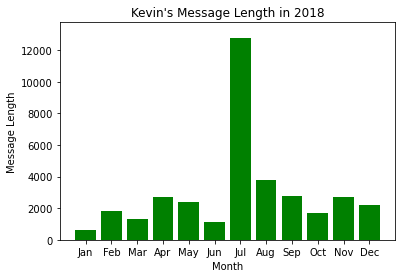

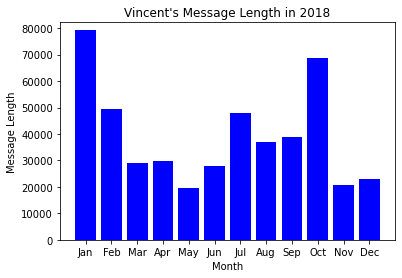

In [3]:
import matplotlib.pyplot as plt

# visualizing the length of messages using kevin's data
plt.figure()
month_ser = kevin_2018_data["Month"]                                # general use for month access

plt.bar(month_ser, kevin_2018_data["Message Length"], facecolor="green")

plt.ylim(0, kevin_2018_data["Message Length"].max() + 1000)        # + 1000 to make the max to be seen
plt.xlabel("Month")
plt.ylabel("Message Length")
plt.title("Kevin's Message Length in 2018")
plt.show()

# visualizing the length of messages using vincent's data
plt.figure()
plt.bar(month_ser, vincent_2018_data["Message Length"], facecolor="blue")

plt.ylim(0, vincent_2018_data["Message Length"].max() + 3000)        # + 1000 to make the max to be seen
plt.xlabel("Month")
plt.ylabel("Message Length")
plt.title("Vincent's Message Length in 2018")
plt.show()

#### Punctuation of Messages
Now we want to see how our punctuation is over the years

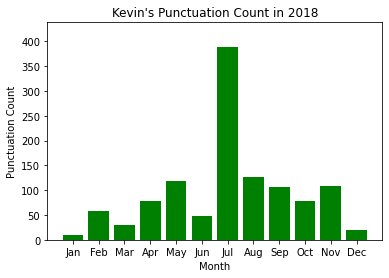

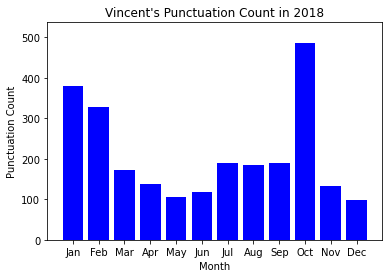

In [4]:
# visualizing the punctuation count in a user's message history
plt.figure()
plt.bar(month_ser, kevin_2018_data["Punctuation Count"], facecolor="green")
    
plt.ylim(0, kevin_2018_data["Punctuation Count"].max() + 50)
plt.xlabel("Month")
plt.ylabel("Punctuation Count")
plt.title("Kevin's Punctuation Count in 2018")
plt.show()

# visualizing the length of messages using vincent's data
plt.figure()
plt.bar(month_ser, vincent_2018_data["Punctuation Count"], facecolor="blue")

plt.ylim(0, vincent_2018_data["Punctuation Count"].max() + 50)        # + 1000 to make the max to be seen
plt.xlabel("Month")
plt.ylabel("Punctuation Count")
plt.title("Vincent's Punctuation Count in 2018")
plt.show()

### Attachments per message
We want to aggregate the data and see how many attachments each of the users have posted in the last 5 years

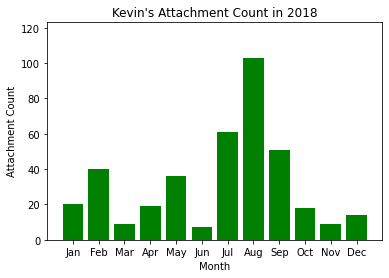

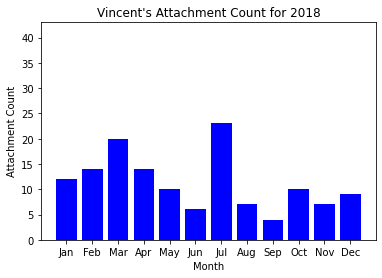

In [5]:
# visualizing attachments within the cleaned data
plt.figure()
plt.bar(month_ser, kevin_2018_data["Attachment Count"], facecolor="green")

# make the graph look nicer
plt.ylim(0, kevin_2018_data["Attachment Count"].max()+ 20)              # increasing the y limit to max graph better to see
plt.xlabel("Month")
plt.ylabel("Attachment Count")
plt.title("Kevin's Attachment Count in 2018")
plt.show()

# visualizing the length of messages using vincent's data
plt.figure()
plt.bar(month_ser, vincent_2018_data["Attachment Count"], facecolor="blue")

plt.ylim(0, vincent_2018_data["Attachment Count"].max() + 20)
plt.xlabel("Month")
plt.ylabel("Attachment Count")
plt.title("Vincent's Attachment Count for 2018")
plt.show()

# Data Analysis

### What we want to know
With the cleaned data, we want to dive into a few things.
1. We want to aggregate our data to see the significant statistics of our data.
    - We will also just do a data analysis and create assumptions to test.
1. We want to compare our punctuation by years.
    - We will need to split the data by year.
    - We want to statistically compare two different years.
    - For this test, we will compare the earliest year's punctuation and the latest year's punctuation and see how they differ.
        - We will do this test per for both datasets
        - After the test, we will analyze what it means for our punctuation to change over time.
    
1. We want to compare each other's message lengths over time.
    - We want to see who's message length over the amount of messages is greater.
    - For this test, we want to assume that Vincent's average word count is more than Kevin's average word count.

### Comparing Punctuation

### Comparing Message Lengths

# Classification

# Conclusion